In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [9]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [10]:
df = pd.read_csv('numeric_accidents_data.csv')

In [11]:
df.shape

(617972, 18)

In [12]:
df.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,19


In [13]:
df.columns

Index(['where', 'how', 'illumination', 'typeofroad', 'refnismun', 'refnisdist',
       'refnisprov', 'refnisgew', 'dead', 'deadafter30d', 'mortallyinjured',
       'severelyinjured', 'slightlyinjured', 'month', 'year', 'quarter',
       'dayow', 'hr'],
      dtype='object')

In [14]:
df.columns = ['where', 'how', 'illumination', 'typeofroad', 'refnismun', 'refnisdist',
       'refnisprov', 'refnisgew', 'death', 'deathafter30d', 'mortallyinjured',
       'severelyinjured', 'slightlyinjured', 'month', 'year', 'quarter',
       'dayow', 'hr']

## Missing data

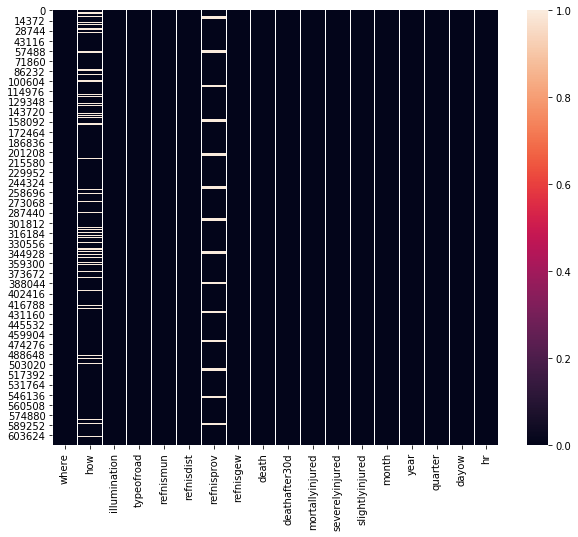

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617972 entries, 0 to 617971
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   where            617972 non-null  float64
 1   how              541110 non-null  float64
 2   illumination     617972 non-null  float64
 3   typeofroad       617972 non-null  float64
 4   refnismun        617972 non-null  int64  
 5   refnisdist       617972 non-null  int64  
 6   refnisprov       564427 non-null  float64
 7   refnisgew        617972 non-null  int64  
 8   death            617972 non-null  int64  
 9   deathafter30d    617972 non-null  int64  
 10  mortallyinjured  617972 non-null  int64  
 11  severelyinjured  617972 non-null  int64  
 12  slightlyinjured  617972 non-null  int64  
 13  month            617972 non-null  int64  
 14  year             617972 non-null  int64  
 15  quarter          617972 non-null  int64  
 16  dayow            617972 non-null  int6

In [17]:
((617972-541110)/617972)*100 

12.43778035250788

In [18]:
((617972-564427)/617972)*100 

8.664632054526743

~12.5% of 'how' missing<br>
~8.7% of 'refnisprov' missing

-do I need them?<br>
-if yes, correlation with another column to replace missing values?<br>
-'refnismun' should have perfect correlation with refnisprov

In [19]:
df_cor = df[['refnismun','refnisprov']]

In [20]:
corrMatrix_ = df_cor.corr()

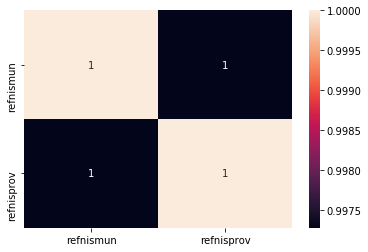

In [21]:
sns.heatmap(corrMatrix_,annot=True)

In [22]:
empty_prov = df_cor[df_cor['refnisprov'].isnull()]

In [23]:
empty_prov

,refnismun,refnisprov
8648,21001,NaN
8649,21001,NaN
8650,21001,NaN
8651,21001,NaN
8652,21001,NaN
...,...,...
590266,21019,NaN
590267,21019,NaN
590268,21019,NaN
590269,21019,NaN


In [24]:
empty_prov['refnismun'].unique()

array([21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019], dtype=int64)

In [25]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [26]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [27]:
df_refnis = pd.read_excel('refnis.xlsx')

In [28]:
#remove french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

In [29]:
df_refnis

,Code NIS,Administratieve eenheden,Taal
0,1000,HET RIJK,NaN
1,4000,BRUSSELS HOOFDSTEDELIJK GEWEST,NaN
2,21000,Arrondissement Brussel Hoofdstad,NaN
3,21001,Anderlecht,NaN
4,21002,Oudergem,NF
...,...,...,...
641,93018,Doische,F
642,93022,Florennes,F
643,93056,Philippeville,F
644,93090,Viroinval,F


In [30]:
list_prov = [21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019]

In [31]:
def printforme(x):
    
    for y in x:
        print(str(y)+' = '+str(df_refnis[df_refnis['Code NIS']==y]['Administratieve eenheden']))

In [32]:
printforme(list_prov)

21001 = 3    Anderlecht
Name: Administratieve eenheden, dtype: object
21002 = 4    Oudergem
Name: Administratieve eenheden, dtype: object
21003 = 5    Sint-Agatha-Berchem
Name: Administratieve eenheden, dtype: object
21004 = 6    Brussel
Name: Administratieve eenheden, dtype: object
21005 = 7    Etterbeek
Name: Administratieve eenheden, dtype: object
21006 = 8    Evere
Name: Administratieve eenheden, dtype: object
21007 = 9    Vorst
Name: Administratieve eenheden, dtype: object
21008 = 10    Ganshoren
Name: Administratieve eenheden, dtype: object
21009 = 11    Elsene
Name: Administratieve eenheden, dtype: object
21010 = 12    Jette
Name: Administratieve eenheden, dtype: object
21011 = 13    Koekelberg
Name: Administratieve eenheden, dtype: object
21012 = 14    Sint-Jans-Molenbeek
Name: Administratieve eenheden, dtype: object
21013 = 15    Sint-Gillis
Name: Administratieve eenheden, dtype: object
21014 = 16    Sint-Joost-ten-Node
Name: Administratieve eenheden, dtype: object
21015 = 17 

-Turns out they are all municipalities in Brussels Capital Region<br>
-NIS Brussels Capital Region = 4000 

In [33]:
def replace_nan(x):    
     
    if pd.isnull(x):
        return 4000
    else:
        return x

In [34]:
df['refnisprov']=df['refnisprov'].apply(replace_nan)

In [35]:
df['refnisprov'].isnull().sum()

0

In [36]:
#df[df['refnisprov']==4000]

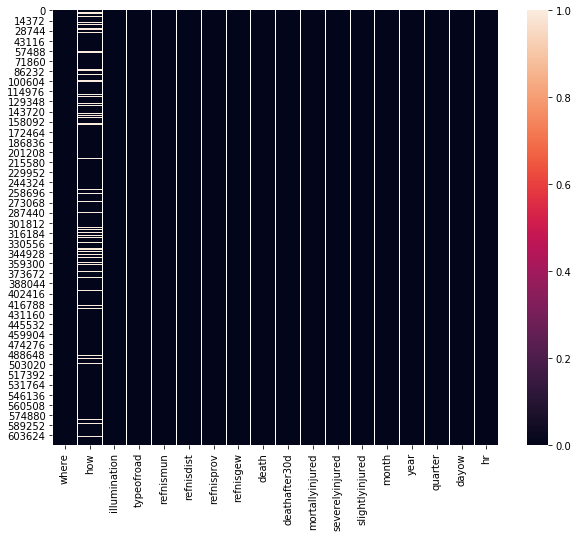

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [38]:
corr_with_how = df.corrwith(df['how'])

In [39]:
corr_with_how.sort_values(ascending=False)

how                1.000000
illumination       0.175358
refnismun          0.124410
refnisdist         0.124369
refnisprov         0.118298
dayow              0.096691
where              0.092684
refnisgew          0.090543
severelyinjured    0.069317
deathafter30d      0.049215
death              0.045864
mortallyinjured    0.017614
year              -0.004144
quarter           -0.004944
month             -0.006420
typeofroad        -0.070383
slightlyinjured   -0.085948
hr                -0.105723
dtype: float64

Too low of a correlation to fill up the NaN's in the how column 

remove NaN rows

In [40]:
df=df.dropna()

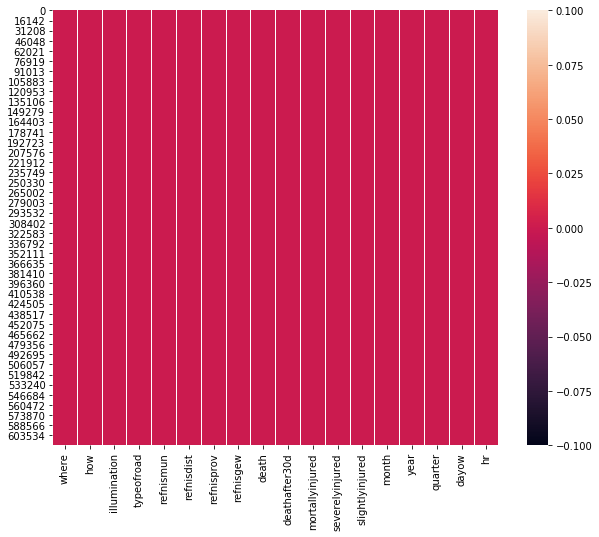

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

No more missing values, moving on.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541110 entries, 0 to 617971
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   where            541110 non-null  float64
 1   how              541110 non-null  float64
 2   illumination     541110 non-null  float64
 3   typeofroad       541110 non-null  float64
 4   refnismun        541110 non-null  int64  
 5   refnisdist       541110 non-null  int64  
 6   refnisprov       541110 non-null  float64
 7   refnisgew        541110 non-null  int64  
 8   death            541110 non-null  int64  
 9   deathafter30d    541110 non-null  int64  
 10  mortallyinjured  541110 non-null  int64  
 11  severelyinjured  541110 non-null  int64  
 12  slightlyinjured  541110 non-null  int64  
 13  month            541110 non-null  int64  
 14  year             541110 non-null  int64  
 15  quarter          541110 non-null  int64  
 16  dayow            541110 non-null  int6

In [43]:
df = df.drop(['refnismun','refnisdist','refnisgew','slightlyinjured'],axis=1)

prov_dict = {4000.0:'1',
            10000.0:'2',
            20001.0:'3',
            20002.0:'4',
            30000.0:'5',
            40000.0:'6',
            50000.0:'7',
            60000.0:'8',
            70000.0:'9',
            80000.0:'10',
            90000.0:'11',}

df['refnisprov'] = df['refnisprov'].replace({4000.0:'1',
            10000.0:'2',
            20001.0:'3',
            20002.0:'4',
            30000.0:'5',
            40000.0:'6',
            50000.0:'7',
            60000.0:'8',
            70000.0:'9',
            80000.0:'10',
            90000.0:'11',})

year_dict = {2005:'5',
            2006:'6',
            2007:'7',
            2008:'8',
            2009:'9',
            2010:'10',
            2011:'11',
            2012:'12',
            2013:'13',
            2014:'14',
            2015:'15',
            2016:'16',
            2017:'17',
            2018:'18'}

df['year'] = df['year'].replace({2005:'5',
            2006:'6',
            2007:'7',
            2008:'8',
            2009:'9',
            2010:'10',
            2011:'11',
            2012:'12',
            2013:'13',
            2014:'14',
            2015:'15',
            2016:'16',
            2017:'17',
            2018:'18'})

slightlyinjured_dict = {2:0,3:0}


## Exploratory Data Analysis 

In [44]:
sns.set_style('whitegrid')

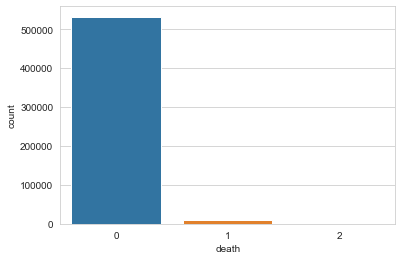

In [45]:
sns.countplot(df['death'])

In [46]:
df['death'].value_counts()

0    532158
1      8951
2         1
Name: death, dtype: int64

Take out the occurence of "2"

In [47]:
df= df[df.death != 2]

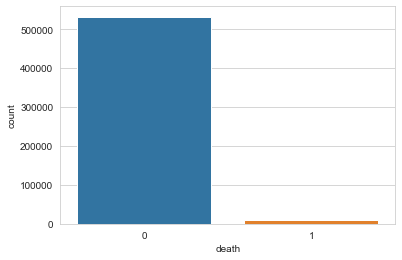

In [48]:
sns.countplot(df['death'])

In [49]:
len(df[df['death']==0])

532158

In [50]:
len(df[df['death']==1])

8951

In [51]:
(8951/(8951+532158))*100

1.654195365443931

1.65% of recordings resulted in death<br>

Dataset (luckily, few deadly accidents as possible!) not well balanced (death/survived ratio)<br>
Unbalanced dataset is not good to train a model<br>
I could try (random) bucketing of the alive cases<br>

In [52]:
532158/8951

59.45235169254832

Possible to make 59 random buckets

In [53]:
bucket_death = df[df['death']==1]

In [54]:
alive_bucket_list = {}

def generate_alive_buckets():
    for name in np.arange(1,59,1):
        alive_bucket_list[name] = df[df['death']==0].sample(n=8951)


In [55]:
generate_alive_buckets()

Append the bucket_death to all the 59 alive buckets

In [56]:
final_bucket_list = {}

def append_alive_death_buckets():
    for x in np.arange(1,59,1):
        final_bucket_list[x] = alive_bucket_list[x].append(bucket_death)
    print('Function is finished')
    

In [57]:
append_alive_death_buckets()

Function is finished


In [58]:
final_bucket_list[8]

,where,how,illumination,typeofroad,refnisprov,death,deathafter30d,mortallyinjured,severelyinjured,month,year,quarter,dayow,hr
121241,1.0,5.0,1.0,2.0,6,0,0,0,0,9,7,3,6,19
336030,2.0,3.0,1.0,1.0,2,0,0,0,0,6,12,2,6,18
597168,2.0,4.0,1.0,2.0,6,0,0,0,0,2,18,1,1,9
445026,1.0,4.0,3.0,2.0,7,0,0,0,0,2,14,1,6,23
435693,2.0,6.0,4.0,2.0,5,0,0,0,0,1,14,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617856,1.0,7.0,1.0,2.0,4,1,1,0,0,7,18,3,3,22
617869,2.0,5.0,5.0,1.0,4,1,1,0,0,7,18,3,6,4
617874,2.0,7.0,3.0,1.0,4,1,1,0,0,11,18,4,1,23
617944,2.0,7.0,3.0,2.0,4,1,1,0,0,6,18,2,6,24


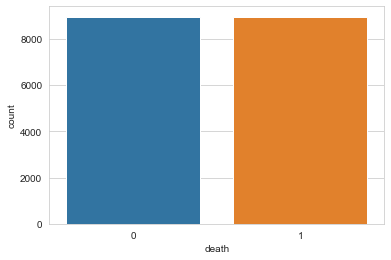

In [59]:
sns.countplot(final_bucket_list[1]['death'])        

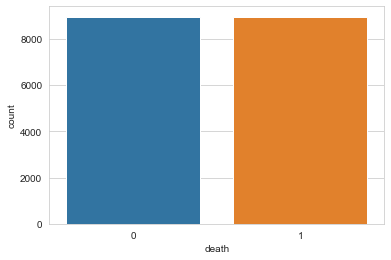

In [60]:
sns.countplot(final_bucket_list[55]['death'])       

In [61]:
final_bucket_list[1]

,where,how,illumination,typeofroad,refnisprov,death,deathafter30d,mortallyinjured,severelyinjured,month,year,quarter,dayow,hr
374984,2.0,4.0,1.0,2.0,3,0,0,0,0,5,12,2,4,20
157804,1.0,5.0,1.0,2.0,1,0,0,0,0,1,8,1,3,13
610328,2.0,7.0,4.0,2.0,10,0,0,0,0,12,18,4,3,18
352712,1.0,5.0,1.0,2.0,6,0,0,0,0,9,12,3,7,17
557018,2.0,8.0,1.0,2.0,6,0,0,0,1,6,17,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617856,1.0,7.0,1.0,2.0,4,1,1,0,0,7,18,3,3,22
617869,2.0,5.0,5.0,1.0,4,1,1,0,0,7,18,3,6,4
617874,2.0,7.0,3.0,1.0,4,1,1,0,0,11,18,4,1,23
617944,2.0,7.0,3.0,2.0,4,1,1,0,0,6,18,2,6,24


In [68]:
type(final_bucket_list[1])

pandas.core.frame.DataFrame

In [78]:
alpha = final_bucket_list[1].corr()

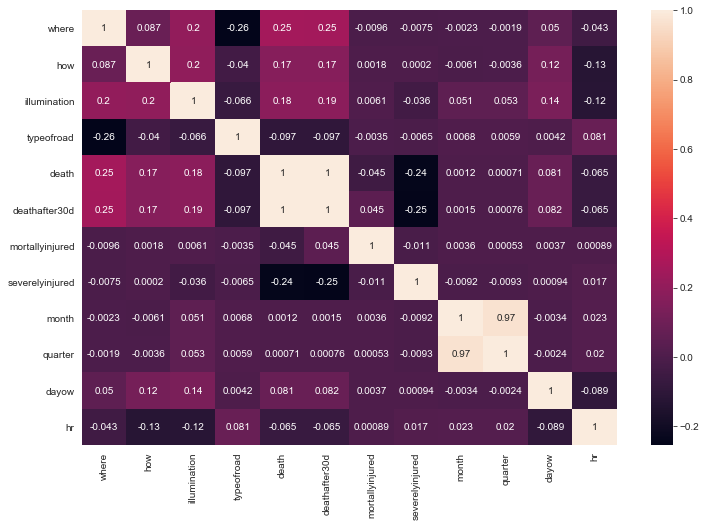

In [80]:
plt.figure(figsize=[12,8])
sns.heatmap(alpha,annot=True)

# Logistic Regression

Train test split, and train the model

In [122]:
final_bucket_list[1].columns

Index(['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'death',
       'deathafter30d', 'mortallyinjured', 'severelyinjured', 'month', 'year',
       'quarter', 'dayow', 'hr'],
      dtype='object')

In [123]:
X = final_bucket_list[1][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dayow', 'hr']]
y = final_bucket_list[1]['death']

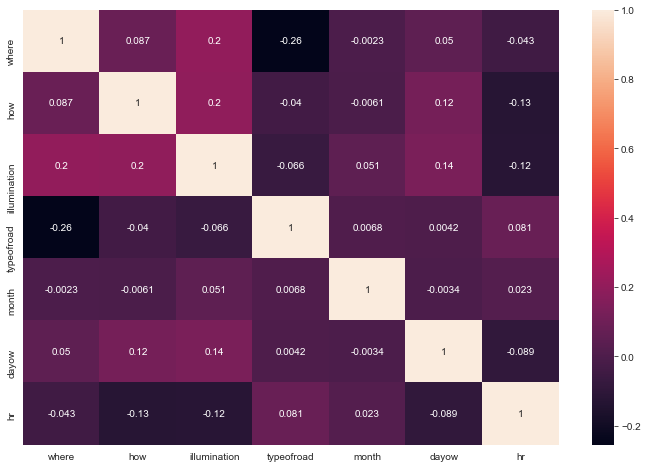

In [124]:
plt.figure(figsize=[12,8])
sns.heatmap(X.corr(),annot=True)

Looks like no data leakage

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.364, random_state=42)

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [131]:
predictions = logmodel.predict(X_test)

In [132]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3266
           1       0.65      0.66      0.66      3251

    accuracy                           0.66      6517
   macro avg       0.66      0.66      0.66      6517
weighted avg       0.66      0.66      0.66      6517



In [134]:
print(accuracy_score(y_test,predictions))

0.6565904557311647


In [135]:
print(confusion_matrix(y_test,predictions))

[[2133 1133]
 [1105 2146]]


 TP   FN<br>
 FP   TN<br>

-TP times it predicts correctly that an accident wil occur<br>
-FP times it predicts incorrectly that an accident will occur<br>
-FN times it predicts incorrectly there's no accident, while there is<br>
-TN times it predicts correctly that there won't be an accident<br>

## effect of test_size?

In [140]:
list_plot = []

for alpha in  np.arange(0.005, 1, 0.005):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=alpha, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    list_plot.append(float(accuracy_score(y_test,predictions)))


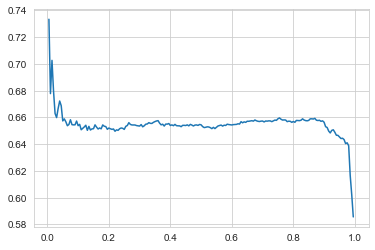

In [141]:
plt.plot(np.arange(0.005, 1, 0.005),list_plot)

In [151]:
size=np.arange(0.005, 1, 0.005)

In [152]:
performance = pd.DataFrame([size,list_plot])

In [153]:
performance = performance.transpose()

In [154]:
performance.columns = ['test size','accuracy_score']

In [155]:
performance = performance[performance['test size'].between(0.2, 0.85)]

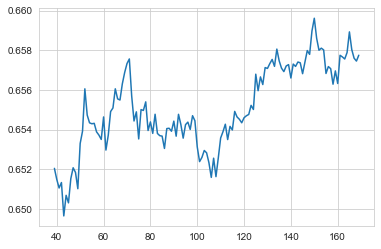

In [156]:
performance['accuracy_score'].plot()

In [157]:
performance['accuracy_score'].max()

0.6596138196345342

In [159]:
performance[performance['accuracy_score']==0.6596138196345342]

,test size,accuracy_score
150,0.755,0.659614


Test size = 0.346 for accuracy of 0.668119 for bucket 1

## Let's automate 

For bucket 1:59<br><br>

1.Use the following columns for X and y<br>

X = final_bucket_list[x][['where', 'how', 'illumination', 'typeofroad', 'refnisprov', 'month', 'year', 'dayow', 'hr']]<br>
y = final_bucket_list[x]['death']<br><br>

2.Train/test split<br>
3.Scale the data<br>
4.Make the model<br>
.